<a href="https://colab.research.google.com/github/Sedowlas/Cat-Boost/blob/main/Restaurant_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Id : идентификатор ресторана.  
Дата открытия: дата открытия ресторана  
Город: город, в котором находится ресторан. Обратите внимание, что в названиях есть unicode.  
Городская группа: Тип города. Большие города или другие.  
Тип: Тип ресторана. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  
P1, P2 - P37: Есть три категории этих запутанных данных. Демографические данные собираются от сторонних поставщиков с помощью ГИС-систем. К ним относятся население в любой заданной области, распределение по возрасту и полу, масштабы развития. Данные о недвижимости в основном касаются м2 местоположения, переднего фасада местоположения, наличия парковки. Коммерческие данные в основном включают в себя наличие точек интереса, включая школы, банки, других операторов QSR.  
Доход: Столбец доходов указывает (преобразованный) доход ресторана в данном году и является целью прогнозного анализа. Обратите внимание, что значения преобразуются, поэтому они не означают реальные долларовые значения.

In [ ]:
import pandas as pd

https://drive.google.com/file/d/1V99jeMUM1iMGHgo-UQpd4U65A5oM0h3c/view?usp=sharing

#Загрузка данных

In [ ]:
! gdown 1V99jeMUM1iMGHgo-UQpd4U65A5oM0h3c

Downloading...
From: https://drive.google.com/uc?id=1V99jeMUM1iMGHgo-UQpd4U65A5oM0h3c
To: /content/restaurant-revenue-prediction.zip
100% 2.81M/2.81M [00:00<00:00, 188MB/s]


In [ ]:
! unzip /content/restaurant-revenue-prediction.zip

Archive:  /content/restaurant-revenue-prediction.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Предобработка

In [ ]:
df = pd.read_csv('/content/train.csv.zip')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
len(df)

137

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

#Анализ

In [ ]:
df.groupby(['open_date','city','city_group','type'])['revenue'].agg(['count','mean'])

,,,,count,mean
open_date,city,city_group,type,,
01/03/2014,İstanbul,Big Cities,IL,1,3780019.0
01/07/2000,İstanbul,Big Cities,FC,2,13596015.5
01/09/2010,Konya,Other,FC,1,1882131.0
01/17/2009,Şanlıurfa,Other,FC,1,3261924.0
01/18/2011,İstanbul,Big Cities,FC,1,5461700.0
01/22/2007,Adana,Other,IL,1,4467728.0
01/25/2010,Adana,Other,IL,1,6313221.0
01/25/2014,İstanbul,Big Cities,FC,1,1149870.0
01/26/2009,İstanbul,Big Cities,FC,1,6694797.0


#Обучение

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df)

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=1)

In [ ]:
val, test = train_test_split(test,train_size=0.5,random_state=1)

In [ ]:
!pip install catboost

In [ ]:
train.columns

Index(['id', 'open_date', 'city', 'city_group', 'type', 'p1', 'p2', 'p3', 'p4',
       'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15',
       'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25',
       'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35',
       'p36', 'p37', 'revenue'],
      dtype='object')

In [ ]:
df.head()

,id,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
X = ['id','open_date', 'city', 'city_group','type','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','p21','p22','p23','p24','p25','p26','p27','p28','p29','p30','p31','p32','p33','p34','p35','p36','p37']

cat_features = ['open_date','city','city_group','type']

y = ['revenue']      

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
params = {'cat_features': cat_features,
              'learning_rate':0.002,
              'random_seed':1,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 2457842.2008002	test: 1802756.1063675	best: 1802756.1063675 (0)	total: 2.19ms	remaining: 2.18s
100:	learn: 2373275.3610285	test: 1786939.8785082	best: 1786877.7742221 (99)	total: 205ms	remaining: 1.82s
200:	learn: 2294121.9920746	test: 1772349.7561434	best: 1772349.7561434 (200)	total: 389ms	remaining: 1.55s
300:	learn: 2218141.6488446	test: 1760926.3576292	best: 1760926.3576292 (300)	total: 593ms	remaining: 1.38s
400:	learn: 2149656.0999522	test: 1754094.1965645	best: 1753128.0660812 (395)	total: 821ms	remaining: 1.23s
500:	learn: 2086691.8557000	test: 1749022.4465131	best: 1748595.9438220 (497)	total: 1.02s	remaining: 1.02s
600:	learn: 2024975.1059320	test: 1744931.7222603	best: 1744807.7435963 (594)	total: 1.22s	remaining: 811ms
700:	learn: 1963537.0959327	test: 1739004.6802132	best: 1739004.6802132 (700)	total: 1.43s	remaining: 608ms
800:	learn: 1907314.1806344	test: 1737184.5879482	best: 1737079.8796905 (790)	total: 1.61s	remaining: 401ms
900:	learn: 1852736.0331222	test

In [ ]:
test['revenue_pred'] = model.predict(test[X])

In [ ]:
test.head()

,id,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue,revenue_pred,error
109,109,08/25/2007,Ankara,Big Cities,FC,2,4.0,3.0,5.0,4,5,5,4,4,4,5,4,4.0,0,0,0,0,0,1,2,1,1,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4219263.0,4.144514e+06,-1.687185e+04
39,39,03/28/2009,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,3,5,4,4,4,4,4,4.0,4,4,3,3,3,3,5,1,2,2,3,3,3.0,1.0,2.0,2.0,4,1,2,2,3,4,3,2,3818055.0,4.770739e+06,8.275090e+05
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,4.143829e+06,-7.766628e+04
51,51,11/08/2011,Kastamonu,Other,IL,2,2.0,4.0,4.0,2,2,4,4,5,5,4,5,5.0,0,0,0,0,0,5,4,2,1,2,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3273041.0,3.773474e+06,7.504824e+05
40,40,02/09/2011,İstanbul,Big Cities,IL,3,5.0,4.0,4.0,2,2,5,1,4,4,5,2,4.0,4,4,4,3,3,5,5,5,1,1,5,5,5.0,1.0,3.0,2.0,5,5,3,3,3,4,3,2,6836483.0,5.081792e+06,-2.032236e+06


#Ошибка

In [ ]:
test['error'] = test['revenue_pred'] - test['revenue']

In [ ]:
test

,id,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue,revenue_pred,error
109,109,08/25/2007,Ankara,Big Cities,FC,2,4.0,3.0,5.0,4,5,5,4,4,4,5,4,4.0,0,0,0,0,0,1,2,1,1,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4219263.0,4.144514e+06,-7.474859e+04
39,39,03/28/2009,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,3,5,4,4,4,4,4,4.0,4,4,3,3,3,3,5,1,2,2,3,3,3.0,1.0,2.0,2.0,4,1,2,2,3,4,3,2,3818055.0,4.770739e+06,9.526837e+05
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,4.143829e+06,-1.728860e+05
51,51,11/08/2011,Kastamonu,Other,IL,2,2.0,4.0,4.0,2,2,4,4,5,5,4,5,5.0,0,0,0,0,0,5,4,2,1,2,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3273041.0,3.773474e+06,5.004328e+05
40,40,02/09/2011,İstanbul,Big Cities,IL,3,5.0,4.0,4.0,2,2,5,1,4,4,5,2,4.0,4,4,4,3,3,5,5,5,1,1,5,5,5.0,1.0,3.0,2.0,5,5,3,3,3,4,3,2,6836483.0,5.081792e+06,-1.754691e+06
123,123,11/05/2011,Bolu,Other,FC,1,1.0,4.0,3.0,1,1,1,4,5,5,3,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4263629.0,3.730889e+06,-5.327405e+05
126,126,07/20/2008,Isparta,Other,IL,3,3.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,5,4,2,4,5,5,2,1,4,3,3,3.0,2.0,2.0,3.0,5,5,5,4,2,5,3,2,4015749.0,4.252493e+06,2.367437e+05
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635.0,4.613220e+06,-5.534151e+05
42,42,09/27/2011,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,4,4,10,8,10,10,6,10,7.5,0,0,0,0,0,25,15,6,4,20,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,4952255.0,4.744734e+06,-2.075214e+05
83,83,08/12/1998,İstanbul,Big Cities,IL,2,4.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,4,4,5,5,5,2,4,1,2,1,5,5,5.0,1.0,2.0,3.0,5,5,5,3,4,4,5,3,5966193.0,5.196451e+06,-7.697421e+05


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

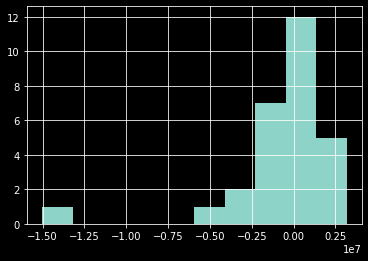

In [ ]:
test['error'].hist()

In [ ]:
test['error'].mean()

-618521.7283400425

#Test

In [ ]:
dff = pd.read_csv('/content/test.csv.zip')

In [ ]:
dff.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
len(dff)

100000

In [ ]:
dff.columns = dff.columns.str.lower().str.replace(' ','_')

In [ ]:
X = ['id','open_date', 'city', 'city_group','type','p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13','p14','p15','p16','p17','p18','p19','p20','p21','p22','p23','p24','p25','p26','p27','p28','p29','p30','p31','p32','p33','p34','p35','p36','p37']

cat_features = ['open_date','city','city_group','type']

y = ['revenue']      

In [ ]:
params = {'cat_features': cat_features,
              'learning_rate':0.002,
              'random_seed':1,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**params)

In [ ]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 2457842.2008002	test: 1802756.1063675	best: 1802756.1063675 (0)	total: 2.21ms	remaining: 2.21s
100:	learn: 2373275.3610285	test: 1786939.8785082	best: 1786877.7742221 (99)	total: 201ms	remaining: 1.79s
200:	learn: 2294121.9920746	test: 1772349.7561434	best: 1772349.7561434 (200)	total: 381ms	remaining: 1.51s
300:	learn: 2218141.6488446	test: 1760926.3576292	best: 1760926.3576292 (300)	total: 578ms	remaining: 1.34s
400:	learn: 2149656.0999522	test: 1754094.1965645	best: 1753128.0660812 (395)	total: 786ms	remaining: 1.17s
500:	learn: 2086691.8557000	test: 1749022.4465131	best: 1748595.9438220 (497)	total: 999ms	remaining: 995ms
600:	learn: 2024975.1059320	test: 1744931.7222603	best: 1744807.7435963 (594)	total: 1.19s	remaining: 787ms
700:	learn: 1963537.0959327	test: 1739004.6802132	best: 1739004.6802132 (700)	total: 1.38s	remaining: 587ms
800:	learn: 1907314.1806344	test: 1737184.5879482	best: 1737079.8796905 (790)	total: 1.56s	remaining: 388ms
900:	learn: 1852736.0331222	test

In [ ]:
dff['revenue'] = model.predict(dff[X])

In [ ]:
dff.head()

,id,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3.991481e+06
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,3.907846e+06
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4.226719e+06
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,3.948529e+06
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,4.314817e+06


In [ ]:
df_new =dff[['id','revenue']].copy()

In [ ]:
df_new.head()

,id,revenue
0,0,3.991481e+06
1,1,3.907846e+06
2,2,4.226719e+06
3,3,3.948529e+06
4,4,4.314817e+06


In [ ]:
df_new.columns = ['Id', 'Prediction']

In [ ]:
df_new.to_csv('rest.csv',index=False)